In [171]:
%pip install pydicom
%pip install matplotlib
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 64.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 74.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Dataset Description

- Modalities - MR
- Number of Participants - 346
- Number of Studies - 349
- Number of Series - 18,321
- Number of Images - 309,251
- Images Size (GB) - 15.1

Of this, we will only use the t2tsesag MR Images

In [71]:
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [90]:
dataset_path = Path('../data/PROSTATEx-v1-doiJNLP/PROSTATEx/')

patients = sorted(f for f in os.listdir(dataset_path) if f.startswith('ProstateX'))

t2tsetra_folders = list(dataset_path.glob('**/*t2tsetra*'))


print('Number of t2tsetra images:', len(t2tsetra_folders))

Number of t2tsetra images: 431


In [93]:
patient_t2tsetra = [list( (dataset_path / patient).glob('**/*t2tsetra*')) for patient in patients]

There seems to be varying number of t2tsetra series for each patient

In [94]:
patient_t2tsetra

[[PosixPath('../data/PROSTATEx-v1-doiJNLP/PROSTATEx/ProstateX-0000/07-07-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/4.000000-t2tsetra-00702')],
 [PosixPath('../data/PROSTATEx-v1-doiJNLP/PROSTATEx/ProstateX-0001/07-08-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-95738/6.000000-t2tsetra-76610'),
  PosixPath('../data/PROSTATEx-v1-doiJNLP/PROSTATEx/ProstateX-0001/07-08-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-95738/10.000000-t2tsetra-17541')],
 [PosixPath('../data/PROSTATEx-v1-doiJNLP/PROSTATEx/ProstateX-0002/07-15-2011-MR prostaat kanker detectiemc MCAPRODET-88784/4.000000-t2tsetra-44920')],
 [PosixPath('../data/PROSTATEx-v1-doiJNLP/PROSTATEx/ProstateX-0003/10-17-2011-MC prostaat kliniek detectie-mc MCPROSKL30-03010/3.000000-t2tsetra-30967')],
 [PosixPath('../data/PROSTATEx-v1-doiJNLP/PROSTATEx/ProstateX-0004/10-18-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-45493/5.000000-t2tsetra-75680')],
 [PosixPath('../data/PROSTATEx-v1-doiJNLP/PROSTATEx/ProstateX-000

In [95]:
t2tsetra_counts = {}
for t2paths in patient_t2tsetra:
    t2tsetra_counts[len(t2paths)] = t2tsetra_counts.get(len(t2paths), 0) + 1

t2tsetra_counts

{1: 264, 2: 79, 3: 3}

In [84]:
num_slices = [len(os.listdir(f)) for f in t2tsetra_folders]

Varying number of slices for each series as well

In [85]:
num_slices_counts = {}

for n in num_slices:
    num_slices_counts[n] = num_slices_counts.get(n, 0) + 1

sorted(num_slices_counts.items())

[(18, 1),
 (19, 220),
 (20, 2),
 (21, 142),
 (22, 2),
 (23, 47),
 (24, 1),
 (25, 12),
 (27, 3),
 (29, 1)]

In [86]:
import pydicom
import numpy as np

In [158]:
def load_dicom_images(patient_path):
    images = []
    for dicom_file in sorted(patient_path.glob('*.dcm')):
        ds = pydicom.dcmread(dicom_file).pixel_array
        images.append(ds)
    return images

In [159]:
img = load_dicom_images(patient_t2tsetra[0][0])

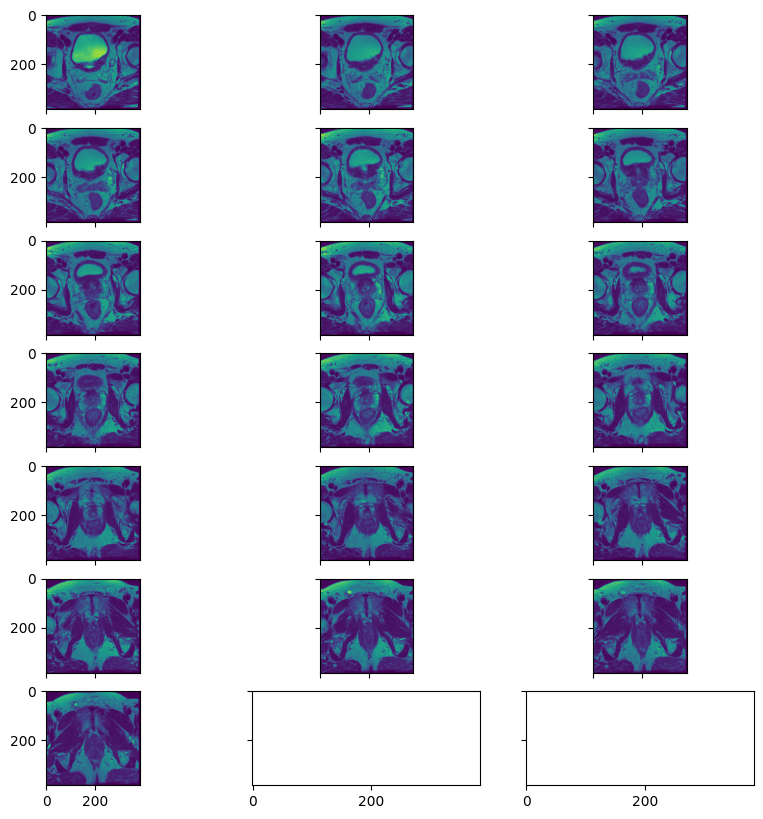

In [160]:
fig, axs = plt.subplots(-(-len(img) // 3), 3, sharex=True, sharey=True)
fig.set_size_inches(10, 10)
for i in range(len(img)):
    axs[i // 3, i % 3].imshow(img[i])


plt.show()

What a surprise, more variance in the different sizes of images

In [167]:
sizes = {}

for patient, patient_images in zip(patients, patient_t2tsetra):
    img = load_dicom_images(patient_images[0])
    sizes[img[0].shape] = sizes.get(img[0].shape, 0) + 1

sizes

{(384, 384): 280, (320, 320): 60, (640, 640): 5, (256, 256): 1}

(384, 384)

In [172]:
import pandas as pd

labels_train = pd.read_csv('./ProstateX-TrainingLesionInformationv2/ProstateX-Images-Train.csv')
findings_train = pd.read_csv('./ProstateX-TrainingLesionInformationv2/ProstateX-Findings-Train.csv')

In [179]:
labels_train

,ProxID,Name,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
0,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST_ADC,7
1,ProstateX-0000,ep2d_diff_tra_DYNDIST0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
2,ProstateX-0000,ep2d_diff_tra_DYNDIST1,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
3,ProstateX-0000,ep2d_diff_tra_DYNDIST2,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
4,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDISTCALC_BVAL,8
...,...,...,...,...,...,...,...,...,...,...,...,...
3864,ProstateX-0203,tfl_3d_dynamisch_fast0,2,10.0280456542969 -4.62264251708984 -90.3759994...,"1.79688,3.68545e-010,-1.13355e-016,-116.895,-3...",71 65 5,NaN,4.5,"1.79688,1.79688,4.5",128x128x12x1,tfl_3d dynamisch fast,18
3865,ProstateX-0203,tfl_3d_dynamisch_fast0,1,-10.02681 -18.5905 -75.1691,"1.79688,3.68545e-010,-1.13355e-016,-116.895,-3...",59 56 7,NaN,4.5,"1.79688,1.79688,4.5",128x128x12x1,tfl_3d dynamisch fast,19
3866,ProstateX-0203,tfl_3d_dynamisch_fast0,2,10.0280456542969 -4.62264251708984 -90.3759994...,"1.79688,3.68545e-010,-1.13355e-016,-116.895,-3...",71 65 5,NaN,4.5,"1.79688,1.79688,4.5",128x128x12x1,tfl_3d dynamisch fast,19
3867,ProstateX-0203,tfl_3d_PD_reference0,1,-10.02681 -18.5905 -75.1691,"1.79688,3.68545e-010,-1.13355e-016,-116.895,-3...",59 56 7,NaN,4.5,"1.79688,1.79688,4.5",128x128x12x1,tfl_3d PD reference,10


In [176]:
labels_train['ijk'].str.split(expand=True)

,0,1,2
0,36,72,9
1,36,72,9
2,36,72,9
3,36,72,9
4,36,72,9
...,...,...,...
3864,71,65,5
3865,59,56,7
3866,71,65,5
3867,59,56,7


In [174]:
labels_train['i'], labels_train['j'], labels_train['k'] = labels_train['ijk'].split()

AttributeError: 'Series' object has no attribute 'split'